In [18]:
import h2o
h2o.init(max_mem_size = 2)            #uses all cores by default
h2o.remove_all()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 7 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_SusanLi_xym1jo
H2O cluster total nodes:,1
H2O cluster free memory:,3.358 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [20]:
higgs = h2o.import_file('higgs_boston_train.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
higgs.head()

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331,s
100001,160.937,68.768,103.235,48.146,-999,-999,-999,3.473,2.078,125.157,0.879,1.414,-999,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999,-999,-999,46.226,2.23358,b
100002,-999,162.172,125.953,35.635,-999,-999,-999,3.148,9.336,197.814,3.776,1.414,-999,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999,-999,-999,44.251,2.34739,b
100003,143.905,81.417,80.943,0.414,-999,-999,-999,3.31,0.414,75.968,2.354,-1.285,-999,22.647,-1.655,0.01,53.321,-0.522,-3.1,31.082,0.06,86.062,0,-999,-999,-999,-999,-999,-999,0,5.44638,b
100004,175.864,16.915,134.805,16.405,-999,-999,-999,3.891,16.405,57.983,1.056,-1.385,-999,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999,-999,-999,-999,-999,-999,0,6.24533,b
100005,89.744,13.55,59.149,116.344,2.636,284.584,-0.54,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66,0.083414,b
100006,148.754,28.862,107.782,106.13,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.85,1.113,2.409,97.24,0.675,-0.966,38.421,-1.443,294.074,2,123.01,0.864,1.45,56.867,0.131,-2.767,179.877,0.00265331,s
100007,154.916,10.418,94.714,29.169,-999,-999,-999,2.897,1.526,138.178,0.365,-1.305,-999,78.8,0.654,1.547,28.74,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999,-999,-999,30.638,0.0186361,s
100008,105.594,50.559,100.989,4.288,-999,-999,-999,2.904,4.288,65.333,0.675,-1.366,-999,39.008,2.433,-2.532,26.325,0.21,1.884,37.791,0.024,129.804,0,-999,-999,-999,-999,-999,-999,0,5.296,b
100009,128.053,88.941,69.272,193.392,-999,-999,-999,1.609,28.859,255.123,0.599,0.538,-999,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999,-999,-999,167.735,0.00150187,s


In [23]:
higgs.shape

(250000, 33)

In [24]:
higgs_df = higgs.as_data_frame(use_pandas=True)

In [26]:
higgs_df['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [27]:
higgs.describe()

Rows:250000
Cols:33




,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real,real,enum
mins,100000.0,-999.0,0.0,6.329,0.0,-999.0,-999.0,-999.0,0.208,0.0,46.104,0.047,-1.414,-999.0,20.0,-2.499,-3.142,26.0,-2.505,-3.142,0.109,-3.142,13.678,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.00150187,
mean,224999.5,-49.02307943999998,49.23981927600002,81.18198161199993,57.895961656000004,-708.4206753999989,-601.2370507320001,-709.3566028999998,2.3730998439999995,18.917332444000014,158.43221704799967,1.437609431999999,-0.12830470799999993,-708.9851891320004,38.70741912800002,-0.01097304800000001,-0.008171071999999998,46.66020724800001,-0.01950746799999999,0.04354296399999999,41.71723452399997,-0.010119192000000003,209.79717763199974,0.9791760000000007,-348.32956718800006,-399.25431389200037,-399.25978800799976,-692.3812035480005,-709.1216091640001,-709.1186311360004,73.06459138399997,1.6467673438121162,
maxs,349999.0,1192.026,690.075,1349.351,2834.999,8.503,4974.979,16.69,5.684,2834.999,1852.462,19.773,1.414,1.0,764.408,2.497,3.142,560.271,2.503,3.142,2842.617,3.142,2003.976,3.0,1120.573,4.499,3.141,721.456,4.5,3.142,1633.433,7.822542545,
sigma,72168.92798612619,406.3456467028012,35.344885611871845,40.82869053241531,63.655681618336246,454.4805651106833,657.9723021131683,453.01987655208717,0.7829111186453123,22.273493751956497,115.70611513348778,0.844742944661397,1.193584835775017,453.59672120219074,22.412080666702128,1.2140786460280997,1.81676304437486,22.064922404956224,1.2649821484873116,1.8166112628154705,32.89469319196889,1.8122227019871897,126.49950571643997,0.9774263053922425,532.9627893583423,489.33828601793897,489.33388332090385,479.8754958453912,453.3846240477965,453.38901727367033,98.01566200825663,1.875103315448076,
zeros,0,0,3,0,41,6,0,58,0,39,0,0,53,15752,0,0,32,0,35,33,0,44,0,99913,0,26,19,0,9,10,99913,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,100000.0,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2.0,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.002653311,s
1,100001.0,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1.0,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,2.233584487,b
2,100002.0,-999.0,162.172,125.953,35.635,-999.0,-999.0,-999.0,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251,2.347388944,b


In [40]:
train, valid, test = higgs.split_frame([0.6, 0.2], seed = 2019)
higgs_X = higgs.col_names[1: -1]
higgs_y = higgs.col_names[-1]

In [43]:
higgs_model_v1 = H2ODeepLearningEstimator(model_id = 'higgs_v1', epochs = 1, variable_importances = True)
higgs_model_v1.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)
print(higgs_model_v1)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  higgs_v1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.02404827265062027
RMSE: 0.155075054894784
LogLoss: 0.08511327601076424
Mean Per-Class Error: 0.027810905187065638
AUC: 0.994862989427392
pr_auc: 0.9723869853229047
Gini: 0.9897259788547841
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4206674380278053: 


,b,s,Error,Rate
b,6325.0,201.0,0.0308,(201.0/6526.0)
s,102.0,3379.0,0.0293,(102.0/3481.0)
Total,6427.0,3580.0,0.0303,(303.0/10007.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4206674,0.9570882,265.0
max f2,0.1645395,0.9750452,329.0
max f0point5,0.6383996,0.9567481,203.0
max accuracy,0.4206674,0.9697212,265.0
max precision,0.9990267,1.0,0.0
max recall,0.0000030,1.0,399.0
max specificity,0.9990267,1.0,0.0
max absolute_mcc,0.4206674,0.9339222,265.0
max min_per_class_accuracy,0.4258746,0.9693534,263.0
max mean_per_class_accuracy,0.2676730,0.9721891,304.0


Gains/Lift Table: Avg response rate: 34.79 %, avg score: 33.48 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100929,0.9982218,2.8747486,2.8747486,1.0,0.9987904,1.0,0.9987904,0.0290147,0.0290147,187.4748635,187.4748635
,2,0.0200859,0.9971203,2.8747486,2.8747486,1.0,0.9976179,1.0,0.9982070,0.0287274,0.0577420,187.4748635,187.4748635
,3,0.0300789,0.9960280,2.8747486,2.8747486,1.0,0.9965917,1.0,0.9976704,0.0287274,0.0864694,187.4748635,187.4748635
,4,0.0400719,0.9951239,2.8747486,2.8747486,1.0,0.9955700,1.0,0.9971466,0.0287274,0.1151968,187.4748635,187.4748635
,5,0.0500650,0.9940709,2.8747486,2.8747486,1.0,0.9945930,1.0,0.9966369,0.0287274,0.1439242,187.4748635,187.4748635
,6,0.1000300,0.9877110,2.8747486,2.8747486,1.0,0.9912907,1.0,0.9939665,0.1436369,0.2875610,187.4748635,187.4748635
,7,0.1499950,0.9775083,2.8689991,2.8728334,0.998,0.9829158,0.9993338,0.9902854,0.1433496,0.4309107,186.8999138,187.2833413
,8,0.2000600,0.9579274,2.8403205,2.8646971,0.9880240,0.9685857,0.9965035,0.9848550,0.1422005,0.5731112,184.0320508,186.4697067
,9,0.2999900,0.8265363,2.7108880,2.8134615,0.943,0.9111884,0.9786809,0.9603159,0.2708992,0.8440103,171.0887963,181.3461523
,10,0.4000200,0.0349816,1.5307103,2.4926936,0.5324675,0.4626621,0.8670997,0.8358713,0.1531169,0.9971273,53.0710312,149.2693608




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.026016159472311878
RMSE: 0.16129525557905253
LogLoss: 0.08993662727968907
Mean Per-Class Error: 0.030066173141032437
AUC: 0.9937681564751435
pr_auc: 0.9729939027304094
Gini: 0.987536312950287
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36744600566811214: 


,b,s,Error,Rate
b,31642.0,1242.0,0.0378,(1242.0/32884.0)
s,401.0,16634.0,0.0235,(401.0/17035.0)
Total,32043.0,17876.0,0.0329,(1643.0/49919.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3674460,0.9529375,277.0
max f2,0.1978880,0.9728290,323.0
max f0point5,0.6831810,0.9503680,180.0
max accuracy,0.3674460,0.9670867,277.0
max precision,0.9990687,1.0,0.0
max recall,0.0000032,1.0,399.0
max specificity,0.9990687,1.0,0.0
max absolute_mcc,0.3674460,0.9282914,277.0
max min_per_class_accuracy,0.4384682,0.9665982,256.0
max mean_per_class_accuracy,0.2979196,0.9699338,295.0


Gains/Lift Table: Avg response rate: 34.13 %, avg score: 32.87 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100162,0.9980942,2.9245179,2.9245179,0.998,0.9987153,0.998,0.9987153,0.0292926,0.0292926,192.4517875,192.4517875
,2,0.0200124,0.9971116,2.9303786,2.9274453,1.0,0.9976024,0.9989990,0.9981594,0.0292926,0.0585853,193.0378632,192.7445320
,3,0.0300086,0.9960895,2.9245061,2.9264662,0.9979960,0.9965968,0.9986649,0.9976389,0.0292339,0.0878192,192.4506130,192.6466244
,4,0.0400048,0.9951231,2.9245061,2.9259765,0.9979960,0.9956007,0.9984977,0.9971296,0.0292339,0.1170531,192.4506130,192.5976461
,5,0.0500010,0.9939411,2.9127611,2.9233345,0.9939880,0.9945198,0.9975962,0.9966078,0.0291165,0.1461697,191.2761125,192.3334453
,6,0.1000020,0.9864800,2.9186383,2.9209864,0.9959936,0.9904234,0.9967949,0.9935156,0.1459348,0.2921045,191.8638333,192.0986393
,7,0.1500030,0.9740056,2.9033759,2.9151162,0.9907853,0.9808022,0.9947917,0.9892778,0.1451717,0.4372762,190.3375945,191.5116244
,8,0.2000040,0.9517799,2.8693291,2.9036695,0.9791667,0.9639189,0.9908854,0.9829381,0.1434693,0.5807455,186.9329077,190.3669452
,9,0.3000060,0.7895148,2.7343156,2.8472182,0.9330929,0.8934857,0.9716213,0.9531206,0.2734370,0.8541826,173.4315639,184.7218181
,10,0.4000080,0.0295441,1.4446438,2.4965746,0.4929888,0.4241740,0.8519631,0.8208840,0.1444673,0.9986498,44.4643793,149.6574584



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-02-26 17:27:09,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2019-02-26 17:27:13,5.906 sec,4150 obs/sec,0.1002363,1,15059.0,0.1930136,0.1371572,0.8357776,0.9889585,0.8810298,2.8462858,0.0465674,0.2021198,0.1482201,0.8182716,0.9873887,0.8555109,2.9245179,0.0521044
,2019-02-26 17:27:33,25.296 sec,7002 obs/sec,1.0000466,10,150242.0,0.1550751,0.0851133,0.8939915,0.9948630,0.9723870,2.8747486,0.0302788,0.1612953,0.0899366,0.8842694,0.9937682,0.9729939,2.9245179,0.0329133


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Weight,1.0,1.0,0.1286466
DER_mass_vis,0.3377770,0.3377770,0.0434539
DER_mass_MMC,0.2808760,0.2808760,0.0361337
PRI_jet_leading_pt,0.2795483,0.2795483,0.0359629
PRI_jet_leading_phi,0.2575277,0.2575277,0.0331301
---,---,---,---
PRI_lep_eta,0.1882909,0.1882909,0.0242230
PRI_tau_eta,0.1794623,0.1794623,0.0230872
PRI_met_phi,0.1714218,0.1714218,0.0220528
PRI_tau_phi,0.1581337,0.1581337,0.0203434



See the whole table with table.as_data_frame()



In [44]:
var_df = pd.DataFrame(higgs_model_v1.varimp(), columns = ['Variable', 'Relative Importance', 'Scaled Importance', 'Percentage'])
print(var_df.shape)

(31, 4)


In [46]:
var_df.head(10)

,Variable,Relative Importance,Scaled Importance,Percentage
0,Weight,1.000000,1.000000,0.128647
1,DER_mass_vis,0.337777,0.337777,0.043454
2,DER_mass_MMC,0.280876,0.280876,0.036134
3,PRI_jet_leading_pt,0.279548,0.279548,0.035963
4,PRI_jet_leading_phi,0.257528,0.257528,0.033130
5,DER_deltar_tau_lep,0.254214,0.254214,0.032704
6,PRI_jet_subleading_eta,0.243620,0.243620,0.031341
7,PRI_jet_all_pt,0.243580,0.243580,0.031336
8,DER_sum_pt,0.241416,0.241416,0.031057
9,DER_deltaeta_jet_jet,0.240516,0.240516,0.030942


In [49]:
higgs_v1_df = higgs_model_v1.score_history()
higgs_v1_df

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-02-26 17:27:09,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-02-26 17:27:13,5.906 sec,4150 obs/sec,0.100236,1,15059.0,0.193014,0.137157,0.835778,...,0.881030,2.846286,0.046567,0.202120,0.148220,0.818272,0.987389,0.855511,2.924518,0.052104
2,,2019-02-26 17:27:33,25.296 sec,7002 obs/sec,1.000047,10,150242.0,0.155075,0.085113,0.893992,...,0.972387,2.874749,0.030279,0.161295,0.089937,0.884269,0.993768,0.972994,2.924518,0.032913


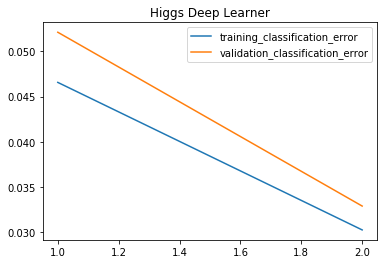

In [52]:
plt.plot(higgs_v1_df['training_classification_error'], label="training_classification_error")
plt.plot(higgs_v1_df['validation_classification_error'], label="validation_classification_error")
plt.title("Higgs Deep Learner")
plt.legend();

In [53]:
pred = higgs_model_v1.predict(test[1:-1]).as_data_frame(use_pandas=True)
test_actual = test.as_data_frame(use_pandas=True)['Label']
(test_actual == pred['predict']).mean()

deeplearning prediction progress: |███████████████████████████████████████| 100%


0.96717891104602172

In [47]:
higgs_model_v2 = H2ODeepLearningEstimator(model_id = 'higgs_v2', hidden = [32, 32, 32], epochs = 1000000,
                                           score_validation_samples = 10000, stopping_rounds = 2, stopping_metric = 'misclassification', 
                                           stopping_tolerance = 0.01)
higgs_model_v2.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [48]:
higgs_v2_df = higgs_model_v2.score_history()
higgs_v2_df

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-02-26 17:33:02,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-02-26 17:33:04,2.154 sec,54008 obs/sec,0.667574,1,100293.0,0.177161,0.105793,0.861606,...,0.940723,2.876482,0.035700,0.183381,0.112063,0.850665,0.992171,0.931645,2.919839,0.035453
2,,2019-02-26 17:33:09,7.227 sec,59430 obs/sec,2.662276,4,399967.0,0.134198,0.063809,0.920591,...,0.978201,2.876482,0.021722,0.135363,0.064045,0.918632,0.997001,0.983158,2.919839,0.022911
3,,2019-02-26 17:33:15,13.088 sec,64229 obs/sec,5.324019,8,799854.0,0.077841,0.024819,0.973283,...,0.956475,2.876482,0.007140,0.073988,0.022476,0.975690,0.999362,0.967411,2.919839,0.006123
4,,2019-02-26 17:33:21,18.811 sec,66716 obs/sec,7.986368,12,1199832.0,0.054206,0.011517,0.987044,...,0.974275,2.876482,0.003017,0.055002,0.011681,0.986566,0.999853,0.955009,2.919839,0.003555
5,,2019-02-26 17:33:26,24.496 sec,68259 obs/sec,10.648630,16,1599797.0,0.047475,0.008089,0.990062,...,0.936304,2.876482,0.002112,0.046520,0.008386,0.990390,0.999938,0.912505,2.919839,0.002271
6,,2019-02-26 17:33:32,30.048 sec,69473 obs/sec,13.309688,20,1999581.0,0.058554,0.015736,0.984882,...,0.869400,2.876482,0.003117,0.049854,0.012284,0.988963,0.999821,0.868623,2.919839,0.002173
7,,2019-02-26 17:33:38,35.806 sec,69849 obs/sec,15.971092,24,2399417.0,0.043850,0.007112,0.991521,...,0.872639,2.876482,0.002112,0.045350,0.008040,0.990867,0.999927,0.881919,2.919839,0.002173
8,,2019-02-26 17:33:44,41.819 sec,69868 obs/sec,18.635584,28,2799717.0,0.044308,0.007347,0.991343,...,0.810791,2.876482,0.001307,0.043401,0.007024,0.991635,0.999988,0.820912,2.919839,0.001086
9,,2019-02-26 17:33:49,47.212 sec,70865 obs/sec,21.300343,32,3200057.0,0.022893,0.002247,0.997689,...,0.935190,2.876482,0.000503,0.017798,0.001711,0.998593,0.999994,0.936552,2.919839,0.000198


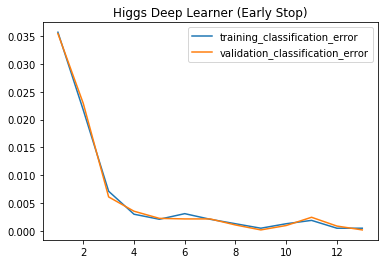

In [50]:
plt.plot(higgs_v2_df['training_classification_error'], label="training_classification_error")
plt.plot(higgs_v2_df['validation_classification_error'], label="validation_classification_error")
plt.title("Higgs Deep Learner (Early Stop)")
plt.legend();

In [54]:
pred = higgs_model_v2.predict(test[1:-1]).as_data_frame(use_pandas=True)
test_actual = test.as_data_frame(use_pandas=True)['Label']
(test_actual == pred['predict']).mean()

deeplearning prediction progress: |███████████████████████████████████████| 100%


0.99927777554869002

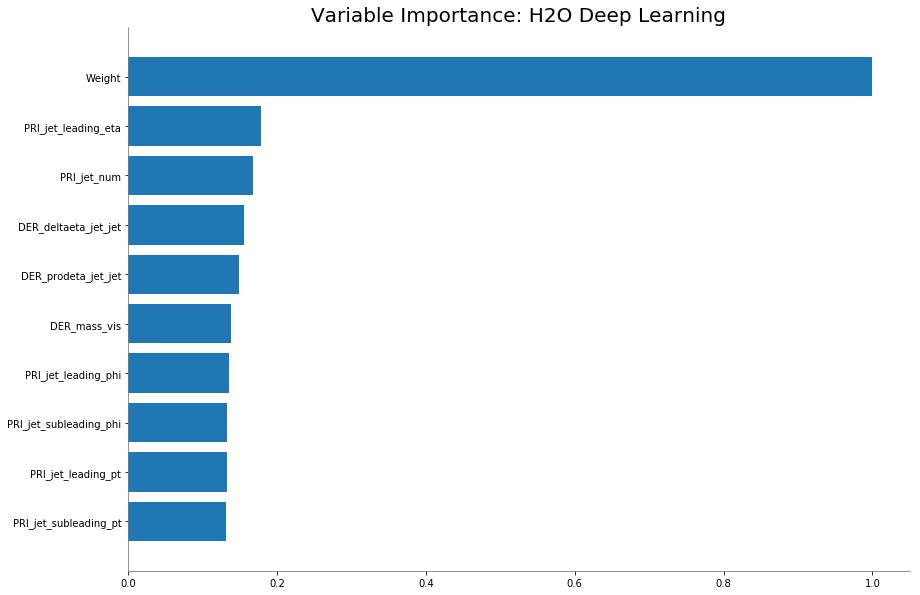

In [56]:
higgs_model_v2.varimp_plot();

In [57]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [58]:
aml.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
XRT_1_AutoML_20190226_174714,1,0.011546,0,0.0411041,0.00168955
StackedEnsemble_BestOfFamily_AutoML_20190226_174714,1,0.000357831,0,0.00241325,5.8238e-06
StackedEnsemble_AllModels_AutoML_20190226_174714,1,0.000357831,0,0.00241325,5.8238e-06
DRF_1_AutoML_20190226_174714,1,0.0138703,1.47664e-05,0.0458373,0.00210105
GLM_grid_1_AutoML_20190226_174714_model_1,0.994749,0.0932277,0.0283046,0.159485,0.0254355


AutoML has built 5 models inlcuding GLM, DRF (Distributed Random Forest) and XRT (Extremely Randomized Trees) and two stacked ensemble models (the 2nd and 3rd) and the best model is XRT.

It turns out, my proud deep learning models are not even on the leaderboard.